In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyensembl
import igraph
#import qnorm
import typing
from scipy.stats import pearsonr, ttest_ind
from itertools import combinations, permutations
from collections import defaultdict


os.chdir('/Users/zagidull/Documents/netzoo/')

In [2]:
# controls
# Tet-on control mice where BCR-ABL expression was suppressed N=3

cList1 = ['COHP_44959','COHP_44960','COHP_44961','COHP_44962','COHP_44963','COHP_44964','COHP_44965','COHP_44966','COHP_44967','COHP_44968',
         'COHP_44969','COHP_44970','COHP_44971','COHP_44972','COHP_44973','COHP_44974','COHP_44975','COHP_44976','COHP_44977']

cList2 = ['COHP_44978','COHP_44979','COHP_44980','COHP_44981','COHP_44982','COHP_44983','COHP_44984','COHP_44985','COHP_44986','COHP_44987',
         'COHP_44988','COHP_44989','COHP_44990','COHP_44991','COHP_44992','COHP_44993','COHP_44994','COHP_44995','COHP_44996']

cList3 = ['COHP_46947','COHP_46948','COHP_46949','COHP_46950','COHP_46951','COHP_46952','COHP_46953','COHP_46954','COHP_46955','COHP_46956',
         'COHP_46957','COHP_46958','COHP_46959','COHP_46960','COHP_46961','COHP_46962','COHP_46963','COHP_46964','COHP_46965']

# samples
# Tet-off CML mice had BCR-ABL expression that induced disease that mimics human chronic phase (CP) CML N=6 

sList1 = ['COHP_44940','COHP_44941','COHP_44942','COHP_44943','COHP_44944','COHP_44945','COHP_44946','COHP_44947','COHP_44948','COHP_44949','COHP_44950',
      'COHP_44951','COHP_44952','COHP_44953','COHP_44954','COHP_44955','COHP_44956','COHP_44957','COHP_44958']

sList2 = ['COHP_44997','COHP_44998','COHP_44999','COHP_45000','COHP_45001','COHP_45002','COHP_45003','COHP_45004','COHP_45005','COHP_45006','COHP_45007',
      'COHP_45008','COHP_45009','COHP_45010','COHP_45011','COHP_45012','COHP_45013','COHP_45014','COHP_45015']

sList3 = ['COHP_46927','COHP_46928','COHP_46929','COHP_46930','COHP_46931','COHP_46932','COHP_46933','COHP_46934','COHP_46935','COHP_46936','COHP_46937',
      'COHP_46938']
sList4 = ['COHP_46939','COHP_46940','COHP_46941','COHP_46942','COHP_46943','COHP_46944','COHP_46945','COHP_46946']

sList5 = ['COHP_49205','COHP_49206','COHP_49207','COHP_49208','COHP_49209','COHP_49210','COHP_49211','COHP_49212','COHP_49213','COHP_49214','COHP_49215',
      'COHP_49216','COHP_49217','COHP_49218','COHP_49219','COHP_49220','COHP_49221','COHP_49222','COHP_49223']

sList6 = ['COHP_49224','COHP_49225','COHP_49226','COHP_49227','COHP_49228','COHP_49229','COHP_49230','COHP_49231','COHP_49232','COHP_49233','COHP_49234',
      'COHP_49235','COHP_49236','COHP_49237','COHP_49238','COHP_49239','COHP_49240']



In [3]:
df = pd.read_csv('GSE244990_cml_mrna_processed_1tpm_in_5_samples.tsv') # https://www.ncbi.xyz/geo/query/acc.cgi?acc=GSE244990
df.iloc[:,0] = df.iloc[:,0].str.split('.',expand=True).iloc[:,0].values
df.rename(columns={'Unnamed: 0':'GeneName'}, inplace=True)
df.set_index('GeneName', inplace=True)

# leave only test and control
df = df.loc[:, cList1+cList2+cList3+sList1+sList2+sList3+sList4+sList5+sList6]
print(df.shape)
df.head()

(14605, 151)


,COHP_44959,COHP_44960,COHP_44961,COHP_44962,COHP_44963,COHP_44964,COHP_44965,COHP_44966,COHP_44967,COHP_44968,...,COHP_49231,COHP_49232,COHP_49233,COHP_49234,COHP_49235,COHP_49236,COHP_49237,COHP_49238,COHP_49239,COHP_49240
GeneName,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,17.406342,3.266614,7.259129,13.431894,12.674619,7.131046,4.469052,4.249506,3.551693,3.870679,...,9.765219,8.740767,12.062470,10.632576,7.755979,7.283368,7.255533,8.210388,12.688882,7.652347
ENSMUSG00000000028,0.839091,0.122129,0.509073,0.686292,0.560700,0.334399,0.216304,0.264193,0.234992,0.225292,...,0.458461,0.191611,0.335522,0.272956,0.174643,0.134446,0.181850,0.252522,0.305135,0.234535
ENSMUSG00000000056,12.520349,2.984387,5.265209,8.858867,8.967312,5.160144,3.746783,3.092756,3.368863,3.431927,...,5.519431,3.967213,6.934809,7.214561,5.082313,5.075716,4.673134,6.057445,7.375306,4.667777
ENSMUSG00000000078,61.903090,7.305902,29.141531,51.048405,48.666836,29.858000,16.414306,14.899977,14.587931,14.953810,...,21.514367,19.739497,29.845851,25.194023,15.983710,17.153416,17.897985,18.948992,30.375489,16.127499
ENSMUSG00000000085,8.691612,1.031623,2.169066,4.911716,4.832813,2.633826,1.718559,1.191713,1.378054,1.319737,...,2.185150,1.389694,2.737419,3.004693,1.663101,1.690415,2.049532,2.088690,2.099431,1.641084


In [4]:
ppi = pd.read_csv('ppi.csv')
print(ppi.shape)
ppi.head()

(18702, 2)


,InteractorA,InteractorB
0,ENSMUSG00000002413,ENSMUSG00000018965
1,ENSMUSG00000002413,ENSMUSG00000025499
2,ENSMUSG00000004936,ENSMUSG00000002413
3,ENSMUSG00000002413,ENSMUSG00000035027
4,ENSMUSG00000001333,ENSG00000134769


In [5]:
ppi_reduced = ppi[ppi.InteractorA.isin(df.index)].reset_index(drop=True)
ppi_reduced = ppi_reduced[ppi_reduced.InteractorB.isin(df.index)].reset_index(drop=True)
print(ppi_reduced.shape)
ppi_reduced.head()

(8142, 2)


,InteractorA,InteractorB
0,ENSMUSG00000002413,ENSMUSG00000018965
1,ENSMUSG00000002413,ENSMUSG00000025499
2,ENSMUSG00000004936,ENSMUSG00000002413
3,ENSMUSG00000002413,ENSMUSG00000035027
4,ENSMUSG00000055371,ENSMUSG00000027363


In [6]:
unique_genes = np.unique(ppi_reduced.values.reshape(-1))

In [7]:
df = df.loc[df.index.isin(unique_genes),:]
print(df.shape)
df.head()

(3608, 151)


,COHP_44959,COHP_44960,COHP_44961,COHP_44962,COHP_44963,COHP_44964,COHP_44965,COHP_44966,COHP_44967,COHP_44968,...,COHP_49231,COHP_49232,COHP_49233,COHP_49234,COHP_49235,COHP_49236,COHP_49237,COHP_49238,COHP_49239,COHP_49240
GeneName,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,17.406342,3.266614,7.259129,13.431894,12.674619,7.131046,4.469052,4.249506,3.551693,3.870679,...,9.765219,8.740767,12.062470,10.632576,7.755979,7.283368,7.255533,8.210388,12.688882,7.652347
ENSMUSG00000000028,0.839091,0.122129,0.509073,0.686292,0.560700,0.334399,0.216304,0.264193,0.234992,0.225292,...,0.458461,0.191611,0.335522,0.272956,0.174643,0.134446,0.181850,0.252522,0.305135,0.234535
ENSMUSG00000000085,8.691612,1.031623,2.169066,4.911716,4.832813,2.633826,1.718559,1.191713,1.378054,1.319737,...,2.185150,1.389694,2.737419,3.004693,1.663101,1.690415,2.049532,2.088690,2.099431,1.641084
ENSMUSG00000000120,1.180865,0.104940,0.369460,0.763601,0.888751,0.337410,0.265665,0.135460,0.331179,0.123587,...,0.678096,0.592698,0.688558,0.395562,0.319570,0.159018,0.038496,0.025650,0.023999,0.009135
ENSMUSG00000000127,4.949228,1.566788,1.073016,1.828003,1.300282,1.038443,1.555120,1.708588,0.860164,1.514558,...,1.724654,1.135650,2.469480,2.130374,1.515938,1.496746,1.430139,1.380953,1.979282,1.421911


In [8]:
def get_neighbours(genename, df_ppi):
    n1 = df_ppi.loc[ df_ppi.InteractorA==genename,'InteractorB'].values
    n2 = df_ppi.loc[ df_ppi.InteractorB==genename,'InteractorA'].values
    n = np.unique(np.concatenate((n1,n2))).tolist()
    return n

In [9]:
holderDict = {}
for idx in df.index:
    holderDict[idx]=get_neighbours(idx, ppi_reduced)

In [10]:
def calculate_entropy(central_gene: str, 
                            local_network: list, 
                            df_input: pd.DataFrame, 
                            refcols: list, 
                            sample_colname: str='') -> float:
    if not sample_colname:
        cols_idx = df_input.columns.isin(refcols)
    else:
        refcols.append(sample_colname)
        cols_idx = df_input.columns.isin(refcols)
    
    df_central = df_input.loc[central_gene,cols_idx].values

    local_entropy = 0
    for gene in local_network:
        upper = abs(pearsonr( df_input.loc[gene,cols_idx].values, df_central)[0])
        lower = 0
        for gene1 in local_network:
            lower += abs(pearsonr( df_input.loc[gene1,cols_idx].values, df_central)[0])
        p_i = upper/lower
        e_i = p_i*np.log2(p_i)
        local_entropy +=e_i

    return(-1*local_entropy/len(local_network))

In [11]:
def calculate_diffsd(central_gene: str, 
                     df_input: pd.DataFrame, 
                     refcols: list, 
                     sample_colname: str) -> float:
    
    cols_idx = df_input.columns.isin(refcols)
    sd_ref = df_input.loc[central_gene, df_input.columns.isin(refcols)].std()
    
    refcols.append(sample_colname)
    cols_idx = df_input.columns.isin(refcols)
    sd_mixin = df_input.loc[central_gene, df_input.columns.isin(refcols)].std()
    #print(sd_ref, sd_mixin)

    return(abs(sd_ref-sd_mixin))

In [16]:
num_genes = 300
for week in [0,1,2,3,4,5,6,7]:

    df_week = df.loc[:, [cList1[week],cList2[week],cList3[week],sList1[week],sList2[week],sList3[week],sList4[week],sList5[week],sList6[week] ]] 
    df_week.columns = ['c1', 'c2', 'c3', 's1', 's2', 's3','s4', 's5', 's6']
    
    for sample in ['s1', 's2', 's3','s4', 's5', 's6']:
        ent=0       
        counter = 0
        for idx in df_week.index[:num_genes]:
            counter += 1
            ent_local = calculate_entropy(central_gene=idx,
                                          local_network=holderDict[idx],
                                          df_input=df_week,
                                          refcols=['c1','c2','c3'])
            ent_sample = calculate_entropy(central_gene=idx,
                                           local_network=holderDict[idx],
                                           df_input=df_week,
                                           refcols=['c1','c2','c3'],
                                           sample_colname=sample)
            sd_differential = calculate_diffsd(central_gene=idx,
                                               df_input=df_week,
                                               refcols=['c1','c2','c3'],
                                               sample_colname=sample)
            entropy_differential = abs(ent_sample-ent_local)
            
            val=entropy_differential*sd_differential
            if np.isnan(val):
                val=0
            ent +=val 
            #if counter % 100==0:
            #    print(idx, counter, ent/counter)
        print(week, sample, ent/len(df_week.index[:num_genes]))
    print('\n')

/Users/zagidull/miniconda3/envs/blas_accelerate/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


0 s1 0.0314846021030805
0 s2 0.002380088022566005
0 s3 0.03858105402628823
0 s4 0.014406070338199167
0 s5 0.024181218108908987
0 s6 0.002628098351559577




/Users/zagidull/miniconda3/envs/blas_accelerate/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


1 s1 0.11835504608328677
1 s2 0.03635633823203341
1 s3 0.04639205340123699
1 s4 0.054849654467616936
1 s5 0.008500188052066603
1 s6 0.03819045150787887




/Users/zagidull/miniconda3/envs/blas_accelerate/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


2 s1 0.1372197072668712
2 s2 0.06758689873917074
2 s3 0.05746186749998014
2 s4 0.12933588818997746
2 s5 0.007512667245750567
2 s6 0.03282285503538295




/Users/zagidull/miniconda3/envs/blas_accelerate/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


3 s1 0.06585334714621771
3 s2 0.003965866861584862
3 s3 0.04791845974906101
3 s4 0.14075554915239177
3 s5 0.00481303953964187
3 s6 0.016625641931682728




/Users/zagidull/miniconda3/envs/blas_accelerate/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


4 s1 0.1555591890938323
4 s2 0.06088181616667402
4 s3 0.05547681833194262
4 s4 0.05783687227454789
4 s5 0.007381855646972975
4 s6 0.02853328009354795




/Users/zagidull/miniconda3/envs/blas_accelerate/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


5 s1 0.04186550980720252
5 s2 0.01598964602298285
5 s3 0.0186637155506678
5 s4 0.13418937842367407
5 s5 0.004185365351158176
5 s6 0.017719918334695224




/Users/zagidull/miniconda3/envs/blas_accelerate/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


6 s1 0.009999509900339926
6 s2 0.035069356300595184
6 s3 0.007987972529429066
6 s4 0.02452195735528781
6 s5 0.002325255302068172
6 s6 0.028069295842706284


7 s1 0.048584122668247756
7 s2 0.10313482526468234
7 s3 0.034937393613543734
7 s4 0.156972881121122
7 s5 0.013518469773021484
7 s6 0.032194697811379874




In [26]:
df_plot = pd.DataFrame([[0.0314846021030805,0.002380088022566005,0.03858105402628823,0.014406070338199167,0.024181218108908987,0.002628098351559577],
 [0.11835504608328677,0.03635633823203341,0.04639205340123699,0.054849654467616936,0.008500188052066603,0.03819045150787887],
 [0.1372197072668712,0.06758689873917074,0.05746186749998014,0.12933588818997746,0.007512667245750567,0.03282285503538295],
 [0.06585334714621771,0.003965866861584862,0.04791845974906101,0.14075554915239177,0.00481303953964187,0.016625641931682728],
 [0.1555591890938323,0.06088181616667402,0.05547681833194262,0.05783687227454789,0.007381855646972975,0.02853328009354795],
 [0.04186550980720252,0.01598964602298285,0.0186637155506678,0.13418937842367407,0.004185365351158176,0.017719918334695224],
 [0.009999509900339926,0.035069356300595184,0.007987972529429066,0.02452195735528781,0.002325255302068172,0.028069295842706284],
 [0.048584122668247756,0.10313482526468234,0.034937393613543734,0.156972881121122,0.013518469773021484,0.032194697811379874]]).T
df_plot.columns = ['wk0','wk1','wk2','wk3','wk4','wk5','wk6','wk7']
df_plot.index = ['s1','s2','s3','s4','s5','s6']

In [28]:
df_plot.T

,s1,s2,s3,s4,s5,s6
wk0,0.031485,0.002380,0.038581,0.014406,0.024181,0.002628
wk1,0.118355,0.036356,0.046392,0.054850,0.008500,0.038190
wk2,0.137220,0.067587,0.057462,0.129336,0.007513,0.032823
wk3,0.065853,0.003966,0.047918,0.140756,0.004813,0.016626
wk4,0.155559,0.060882,0.055477,0.057837,0.007382,0.028533
wk5,0.041866,0.015990,0.018664,0.134189,0.004185,0.017720
wk6,0.010000,0.035069,0.007988,0.024522,0.002325,0.028069
wk7,0.048584,0.103135,0.034937,0.156973,0.013518,0.032195


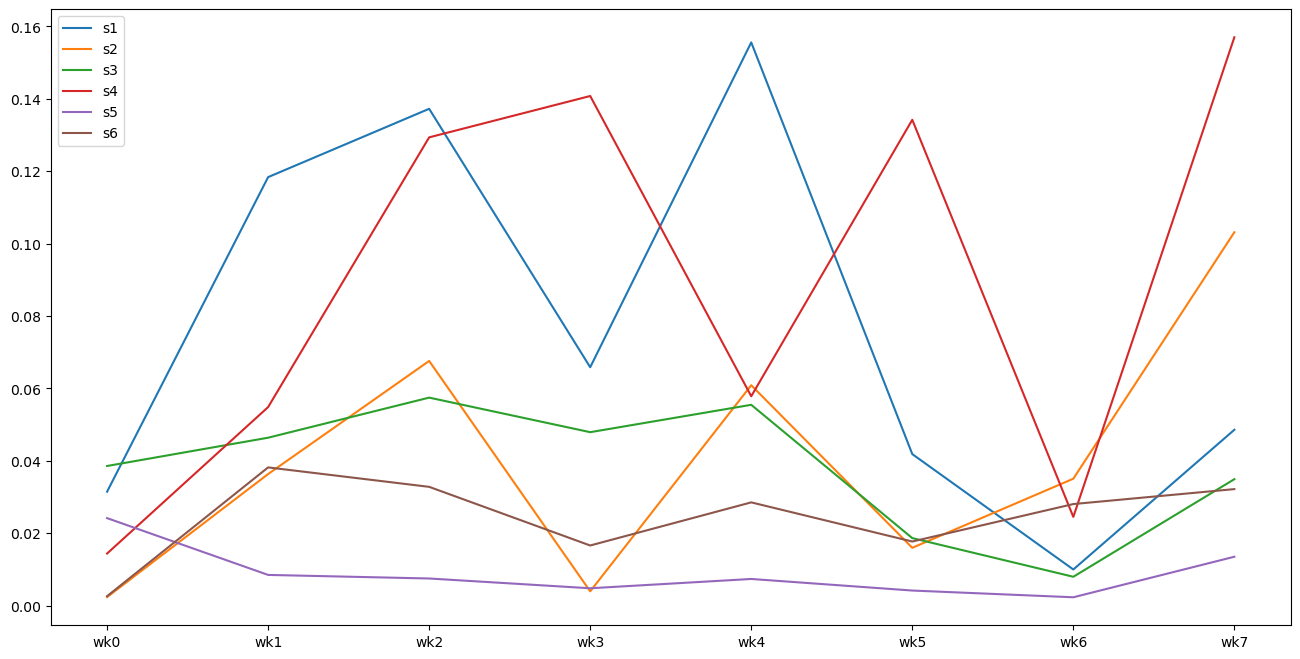

In [29]:
# to set the plot size 
plt.figure(figsize=(16, 8)) 
  
df_plot.T['s1'].plot(label='s1') 
df_plot.T['s2'].plot(label='s2')
df_plot.T['s3'].plot(label='s3')
df_plot.T['s4'].plot(label='s4') 
df_plot.T['s5'].plot(label='s5')
df_plot.T['s6'].plot(label='s6')

  
# adding legend to the curve 
plt.legend()